In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
import tensorflow.keras.callbacks
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt
data_irish = open('/tmp/irish-lyrics-eof.txt').read()

--2020-09-05 14:26:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-09-05 14:26:45 (110 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
tokenizer_irish = Tokenizer()

corpus_irish = data_irish.lower().split("\n")

tokenizer_irish.fit_on_texts(corpus_irish)
total_words_irish = len(tokenizer_irish.word_index) + 1

# create input sequences using list of tokens
input_sequences_irish = []
for line in corpus_irish:
	token_list = tokenizer_irish.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences_irish.append(n_gram_sequence)


# pad sequences 
max_sequence_len_irish = max([len(x) for x in input_sequences_irish])
input_sequences_irish = np.array(pad_sequences(input_sequences_irish, maxlen=max_sequence_len_irish, padding='pre'))

# create predictors and label
predictors_irish, label_irish = input_sequences_irish[:,:-1],input_sequences_irish[:,-1]

label_irish = ku.to_categorical(label_irish, num_classes=total_words_irish)

In [4]:
tokenizer_irish.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'of': 6,
 'my': 7,
 'in': 8,
 'me': 9,
 'for': 10,
 'you': 11,
 'all': 12,
 'was': 13,
 'she': 14,
 'that': 15,
 'on': 16,
 'with': 17,
 'her': 18,
 'but': 19,
 'as': 20,
 'when': 21,
 'love': 22,
 'is': 23,
 'your': 24,
 'it': 25,
 'will': 26,
 'from': 27,
 'by': 28,
 'they': 29,
 'be': 30,
 'are': 31,
 'so': 32,
 'he': 33,
 'old': 34,
 'no': 35,
 'oh': 36,
 'ill': 37,
 'at': 38,
 'one': 39,
 'his': 40,
 'there': 41,
 'were': 42,
 'heart': 43,
 'down': 44,
 'now': 45,
 'we': 46,
 'where': 47,
 'young': 48,
 'never': 49,
 'go': 50,
 'come': 51,
 'then': 52,
 'did': 53,
 'not': 54,
 'said': 55,
 'away': 56,
 'their': 57,
 'sweet': 58,
 'them': 59,
 'green': 60,
 'if': 61,
 'take': 62,
 'our': 63,
 'like': 64,
 'night': 65,
 'day': 66,
 'o': 67,
 'out': 68,
 'fair': 69,
 'this': 70,
 'town': 71,
 'have': 72,
 'can': 73,
 'true': 74,
 'its': 75,
 'thou': 76,
 'see': 77,
 'dear': 78,
 'more': 79,
 'theres': 80,
 'or': 81,
 'had': 82,
 'wou

In [5]:
print(max_sequence_len_irish)

16


In [6]:
total_words_irish

2690

In [7]:
label_irish[:20]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
model_irish = Sequential()
model_irish.add(Embedding(total_words_irish, 100, input_length=max_sequence_len_irish-1))
model_irish.add(Bidirectional(LSTM(150)))
#model_irish.add(Dropout(0.2))
#model_irish.add(LSTM(100))
#model_irish.add(Dense(32, kernel_regularizer=L2(0.01), activation='relu'))
model_irish.add(Dense(total_words_irish, activation='softmax'))

optimizer = Adam(lr=0.01)

model_irish.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model_irish.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           269000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
lr_schedule = tensorflow.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 20))

In [10]:
history_irish = model_irish.fit(predictors_irish, label_irish, epochs=80, verbose=1, 
                                #callbacks=[lr_schedule]
                                )

Epoch 1/80
377/377 [==============================] - 4s 10ms/step - loss: 6.6319 - accuracy: 0.0754
Epoch 2/80
377/377 [==============================] - 4s 10ms/step - loss: 5.7457 - accuracy: 0.1140
Epoch 3/80
377/377 [==============================] - 4s 10ms/step - loss: 4.9014 - accuracy: 0.1608
Epoch 4/80
377/377 [==============================] - 4s 10ms/step - loss: 3.9934 - accuracy: 0.2357
Epoch 5/80
377/377 [==============================] - 4s 10ms/step - loss: 3.1684 - accuracy: 0.3286
Epoch 6/80
377/377 [==============================] - 4s 10ms/step - loss: 2.4837 - accuracy: 0.4416
Epoch 7/80
377/377 [==============================] - 4s 10ms/step - loss: 2.0053 - accuracy: 0.5281
Epoch 8/80
377/377 [==============================] - 4s 9ms/step - loss: 1.6235 - accuracy: 0.6153
Epoch 9/80
377/377 [==============================] - 4s 9ms/step - loss: 1.3609 - accuracy: 0.6761
Epoch 10/80
377/377 [==============================] - 4s 9ms/step - loss: 1.2121 - accuracy:

In [11]:
import matplotlib.pyplot as plt

"""plt.semilogx(history_irish.history["lr"], history_irish.history["loss"])
plt.axis([1e-3, 4e-2, 0, 6])"""

'plt.semilogx(history_irish.history["lr"], history_irish.history["loss"])\nplt.axis([1e-3, 4e-2, 0, 6])'

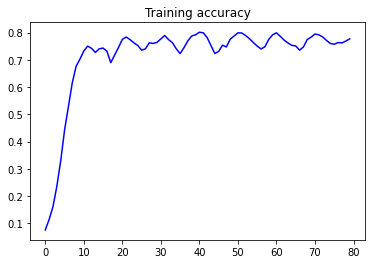

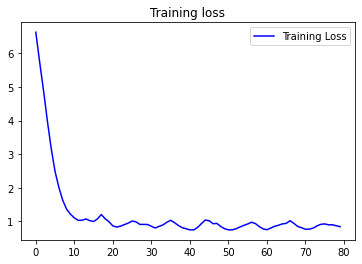

In [12]:
acc = history_irish.history['accuracy']
loss = history_irish.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [18]:
seed_text = "Oh my dear, I"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer_irish.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len_irish-1, padding='pre')
	predicted = model_irish.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer_irish.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Oh my dear, I oft times hear you speak of erins isle they began abusing be sinking love sinking guide from fishers cot along im love im love wexford away and go in many many many only to be still color love my bride so long love gone your late i have been love


In [19]:
model_irish.save('irish_model.h5') 

In [20]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('irish_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>